# Assessment 4

### HPC Files

Within my folder are zipped folders. These are the .log outputs of running the code below on the HPC! I'll keep them up to date but will probably only run this on the final code now. The commented code below the actual code in this notebook are the substitutions made for HPC i.e. chaning the number of epochs of my NN from 10 for my computer to 1000 for the HPC to run.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)
import pickle

%load_ext tensorboard

We first import all the data sets and combine them into one data frame to be used later on (while making some immaterial adjustments to the data).

In [2]:
df_1 = pd.read_csv("https://github.com/Galeforse/DST-Assessment-04/raw/main/Data/UNS1.zip",header=None)
df_2 = pd.read_csv("https://github.com/Galeforse/DST-Assessment-04/raw/main/Data/UNS2.zip",header=None)
df_3 = pd.read_csv("https://github.com/Galeforse/DST-Assessment-04/raw/main/Data/UNS3.zip",header=None)
df_4 = pd.read_csv("https://github.com/Galeforse/DST-Assessment-04/raw/main/Data/UNS4.zip",header=None)

C:\Users\corri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,3,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\corri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,39,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


We need to add headers to each data set. The headers below are based off of the headers given with the data set but expanded slightly to allow for easier reading and understanding of the column.

In [3]:
colnames = (['source_ip', 'source_port', 'dest_ip', 'dest_port', 'proto', 'state', 'duration', 'source_bytes', 'dest_bytes', 'source_ttl',
             'dest_ttl', 'source_loss', 'dest_loss', 'service', 'source_load', 'dest_load', 'source_pkts', 'dest_pkts', 'source_TP_win', 'dest_TP_win', 
             'source_tcp_bn', 'dest_tcp_bn', 'source_mean_sz', 'dest_mean_sz', 'trans_depth', 'res_bdy_len', 'source_jitter', 'dest_jitter', 'start_time',
             'last_time', 'source_int_pk_time', 'dest_int_pk_time', 'tcp_rtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'count_state_ttl', 
             'count_flw_http_mthd', 'is_ftp_login', 'count_ftp_cmd', 'count_srv_source', 'count_srv_dest', 'count_dest_ltm',
             'count_source_ltm', 'count_source_destport_ltm', 'count_dest_sourceport_ltm', 'counts_dest_source_ltm', 'attack_cat', 'Label'])

In [4]:
df_1.columns = colnames
df_2.columns = colnames
df_3.columns = colnames
df_4.columns = colnames

In [5]:
frames = [df_1,df_2,df_3,df_4]
df = pd.concat(frames)

In [6]:
df.head()

,source_ip,source_port,dest_ip,dest_port,proto,state,duration,source_bytes,dest_bytes,source_ttl,...,count_ftp_cmd,count_srv_source,count_srv_dest,count_dest_ltm,count_source_ltm,count_source_destport_ltm,count_dest_sourceport_ltm,counts_dest_source_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [7]:
df.shape

(2540047, 49)

So we have the right headers on the data and have the correct shape so we've done the right steps to get our data into one data frame.

### EDA

The properties of our data can cause errors when running neural networks on them. We look into the problems we may have with our data below during our elementary data analysis.

First we want to look for outliers to determine if we will have issues with too large values e.g. inf, or NaN values. Uncomment/comment the below code to allow visibility of all columns or the normal amount of columns (we need this since we have too many columns to display with normal options).

In [8]:
# pd.options.display.max_columns = None
pd.options.display.max_columns = 20

In [9]:
df.describe()

,duration,source_bytes,dest_bytes,source_ttl,dest_ttl,source_loss,dest_loss,source_load,dest_load,source_pkts,...,count_flw_http_mthd,is_ftp_login,count_srv_source,count_srv_dest,count_dest_ltm,count_source_ltm,count_source_destport_ltm,count_dest_sourceport_ltm,counts_dest_source_ltm,Label
count,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,...,1.191902e+06,1.110168e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06
mean,6.587916e-01,4.339600e+03,3.642759e+04,6.278197e+01,3.076681e+01,5.163921e+00,1.632944e+01,3.695645e+07,2.450861e+06,3.328884e+01,...,2.345856e-01,3.969940e-02,9.206988e+00,8.988958e+00,6.439103e+00,6.900986e+00,4.642139e+00,3.592729e+00,6.845886e+00,1.264870e-01
std,1.392493e+01,5.640599e+04,1.610960e+05,7.462277e+01,4.285089e+01,2.251707e+01,5.659474e+01,1.186043e+08,4.224863e+06,7.628388e+01,...,7.940924e-01,1.996589e-01,1.083676e+01,1.082249e+01,8.162034e+00,8.205062e+00,8.477579e+00,6.174445e+00,1.125828e+01,3.323975e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.037000e-03,2.000000e+02,1.780000e+02,3.100000e+01,2.900000e+01,0.000000e+00,0.000000e+00,1.353963e+05,1.191594e+04,2.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,1.586100e-02,1.470000e+03,1.820000e+03,3.100000e+01,2.900000e+01,3.000000e+00,4.000000e+00,5.893038e+05,5.893179e+05,1.200000e+01,...,0.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00
75%,2.145545e-01,3.182000e+03,1.489400e+04,3.100000e+01,2.900000e+01,7.000000e+00,1.400000e+01,2.039923e+06,2.925974e+06,4.400000e+01,...,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+01,6.000000e+00,7.000000e+00,2.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00
max,8.786638e+03,1.435577e+07,1.465753e+07,2.550000e+02,2.540000e+02,5.319000e+03,5.507000e+03,5.988000e+09,1.287619e+08,1.064600e+04,...,3.600000e+01,4.000000e+00,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.000000e+01,6.700000e+01,1.000000e+00


From this we see that we have no concerns with infinite values and no conerns with NaN values. Standardisation may still be an issue here but this at least rules out complications with these specific values.

One of the considerations in the Neural Network workshop is floating point fragility. Below shows the maximum values in our data and also our maximum values running on both a GPU and a CPU.

In [10]:
df.max()

source_ip                     59.166.0.9
dest_ip                       59.166.0.9
proto                               zero
state                                 no
duration                         8786.64
source_bytes                    14355774
dest_bytes                      14657531
source_ttl                           255
dest_ttl                             254
source_loss                         5319
dest_loss                           5507
service                              ssl
source_load                    5.988e+09
dest_load                    1.28762e+08
source_pkts                        10646
dest_pkts                          11018
source_TP_win                        255
dest_TP_win                          255
source_tcp_bn                 4294958913
dest_tcp_bn                   4294953724
source_mean_sz                      1504
dest_mean_sz                        1500
trans_depth                          172
res_bdy_len                      6558056
source_jitter   

In [11]:
[np.finfo(np.float32).max, np.finfo(np.float64).max]

[3.4028235e+38, 1.7976931348623157e+308]

Thus we see that our maximums are much smaller than the maximum we can process and thus we should be fine.

We first take a look at the attacks in the data set.

In [12]:
df['attack_cat'] = df['attack_cat'].fillna('Normal')

In [13]:
attack_cat_counts = pd.DataFrame(df['attack_cat'].value_counts())
ac_names = attack_cat_counts.index.values
ac_names = np.delete(ac_names,0)
ac_counts = np.array(attack_cat_counts['attack_cat'])
ac_counts = np.delete(ac_counts,0)

label_counts = pd.DataFrame(df['Label'].value_counts())
label_names = ['normal','attack']
label_counts = np.array(label_counts['Label'])

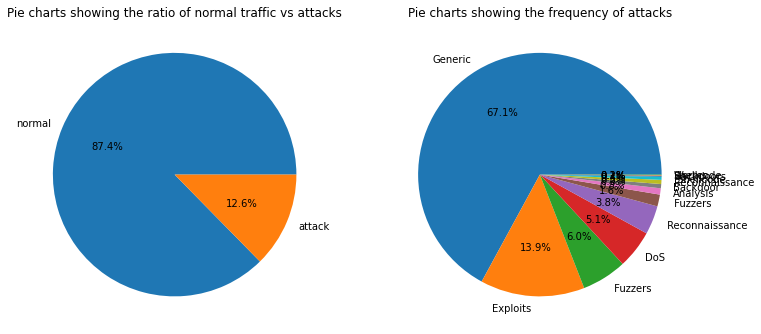

In [14]:
fig, ax = plt.subplots(1,2, figsize=(12,12))

ax[0].pie(label_counts, labels=label_names, autopct='%1.1f%%')

ax[1].pie(ac_counts, labels=ac_names, autopct='%1.1f%%')

ax[0].set_title('Pie charts showing the ratio of normal traffic vs attacks')
ax[1].set_title('Pie charts showing the frequency of attacks')

plt.show()

In [15]:
ac_names

array(['Generic', 'Exploits', ' Fuzzers ', 'DoS', ' Reconnaissance ',
       ' Fuzzers', 'Analysis', 'Backdoor', 'Reconnaissance',
       ' Shellcode ', 'Backdoors', 'Shellcode', 'Worms'], dtype=object)

Here we can see that there are inconsistencies between the attack types. This leads to errors later on which we need to fix. This involves replacing ' Fuzzers ' with 'Fuzzers' etc.

We want to have a look at missingness in our data, especially NaN values.

In [16]:
l = []
colnames = df.columns

for name in colnames:
    if df[name].isnull().values.any():
        l.append(name)
        
print('The columns with na/nan values in them are: ' + str(l))

The columns with na/nan values in them are: ['count_flw_http_mthd', 'is_ftp_login']


We expect attack_cat to have NaN values there as this is specified in the introduction for the data (anything that isn't an attack gets assigned the value NaN). With the help of Alex's analysis, we find that count_flw_http_mthd, is_ftp_login and count_ftp_cmd are missing values, and have NaN values. The first two are easily handled but we want to look into count_ftp_cmd to see what this is actually represented as.

In [17]:
df.groupby('count_ftp_cmd').size()

count_ftp_cmd
0    1056339
1      17087
2       1234
3        729
4        804
5        290
6        332
8         18
     1429879
0      10159
1      22990
2         30
4        156
dtype: int64

So they're just empty values, we handle this later!

### Pre-Processing

We need to pre-process our data before putting it into our neural network. This process takes place here.

From the EDA above, we realised (after some awful effort) that there are NaN in our data so we sort this first. 

Count_flw_http_mthd is: 'No. of flows that has methods such as Get and Post in http service.'. Due to this and the fact that the median value for this is 0, we impute the missing values as 0. 

Is_ftp_login is: 'If the ftp session is accessed by user and password then 1 else 0.' For some reason this doesnt match our data above (we have values of 2 and 4 in this column) but we will assume that the description is correct and therefore similarly impute as 0.

Finally, we need to adjust the count_ftp_cmd which is: 'No of flows that has a command in ftp session.'. Since again the median is 0, and to follow Alex's work, we impute with 0's since there is no easy way to determine the size of these (note that we could run a model to predict these but since that's not the main purpose of this project we'll omit this with the knowledge that with more time we should do this for better work).

In [18]:
df = df.fillna(0)

In [19]:
df.groupby('count_flw_http_mthd').size()

count_flw_http_mthd
0.0     2334936
1.0      188008
2.0         588
3.0         738
4.0        6564
5.0         430
6.0        7902
8.0          56
9.0         270
10.0         30
12.0        132
14.0        224
16.0         48
25.0         25
30.0         60
36.0         36
dtype: int64

In [20]:
df.groupby('is_ftp_login').size()

is_ftp_login
0.0    2496472
1.0      43389
2.0         30
4.0        156
dtype: int64

In [21]:
df['count_ftp_cmd'] = df['count_ftp_cmd'].replace(' ',0)

In [22]:
df.groupby('count_ftp_cmd').size()

count_ftp_cmd
0    2486218
1      17087
2       1234
3        729
4        804
5        290
6        332
8         18
0      10159
1      22990
2         30
4        156
dtype: int64

So it looks like we've handled these!

We now look into replacing the attack categories so that there is consistency between the naming.

In [23]:
df.groupby('attack_cat').size()

attack_cat
 Fuzzers               5051
 Fuzzers              19195
 Reconnaissance       12228
 Shellcode             1288
Analysis               2677
Backdoor               1795
Backdoors               534
DoS                   16353
Exploits              44525
Generic              215481
Normal              2218764
Reconnaissance         1759
Shellcode               223
Worms                   174
dtype: int64

In [24]:
df['attack_cat'] = df['attack_cat'].map({'Normal': 'Normal', 'Exploits': 'Exploits', ' Fuzzers ': 'Fuzzers', 'DoS': 'DoS',
                                          ' Reconnaissance ': 'Reconnaissance', ' Fuzzers': 'Fuzzers', 'Analysis': 'Analysis',
                                         'Backdoor': 'Backdoor', 'Reconnaissance': 'Reconnaissance',  ' Shellcode ': 'Shellcode',
                                         'Backdoors': 'Backdoor', 'Shellcode': 'Shellcode',  'Worms': 'Worms', 'Generic': 'Generic'})

In [25]:
df.groupby('attack_cat').size()

attack_cat
Analysis             2677
Backdoor             2329
DoS                 16353
Exploits            44525
Fuzzers             24246
Generic            215481
Normal            2218764
Reconnaissance      13987
Shellcode            1511
Worms                 174
dtype: int64

So we've fixed this issue and merged everything correctly!

Neural networks process mathematical data e.g. float64 or int64 so we want to turn all of our data into these data types. We'll check the data types we've got to work with and change these to the correct data types where they are objects.

In [26]:
lst = []

for head in colnames:
    if df[head].dtypes == 'O':
        lst.append(head)
        
print('The following columns need their data type changed to integer/float: ')
print('---------------------------------------------------------------------')
lst

The following columns need their data type changed to integer/float: 
---------------------------------------------------------------------


['source_ip',
 'source_port',
 'dest_ip',
 'dest_port',
 'proto',
 'state',
 'service',
 'count_ftp_cmd',
 'attack_cat']

We now look at the columns with non integer entries and convert them to such so that they can be used in our neural networks. This is similar to the process I carried out in assessment 1 and may not be the quickest but is fairly foolproof so I'll keep using it here unless it creates issues with time.

In [27]:
df_source_ip = pd.DataFrame(df['source_ip'])
df_source_port = pd.DataFrame(df['source_port'])
df_dest_ip = pd.DataFrame(df['dest_ip'])
df_dest_port = pd.DataFrame(df['dest_port'])
df_proto = pd.DataFrame(df['proto'])
df_state = pd.DataFrame(df['state'])
df_service = pd.DataFrame(df['service'])
df_count_ftp_cmd = pd.DataFrame(df['count_ftp_cmd'])
df_attack_cat = pd.DataFrame(df['attack_cat'])

In [28]:
# we now create dictionaries to allow us to map onto the data frame

sips = df.source_ip.unique()
sip_dict = dict(zip(sips,range(len(sips))))

sp = df.source_port.unique()
sp_dict = dict(zip(sp,range(len(sp))))
               
dips = df.dest_ip.unique()
dip_dict = dict(zip(dips,range(len(dips))))

dp = df.dest_port.unique()
dp_dict = dict(zip(dp,range(len(dp))))

p = df.proto.unique()
p_dict = dict(zip(p,range(len(p))))

states = df.state.unique()
state_dict = dict(zip(states,range(len(states))))

services = df.service.unique()
service_dict = dict(zip(services,range(len(services))))

cfc = df.count_ftp_cmd.unique()
cfc_dict = dict(zip(cfc,range(len(cfc))))

ac = df.attack_cat.unique()
ac_dict = dict(zip(ac,range(len(ac))))

In [29]:
# we map these dictionaries onto our data frames
#df['source_ip_int'] = df['source_ip'].replace(sip_dict)
#df['source_port_int'] = df['source_port'].replace(sp_dict)
#df['dest_ip_int'] = df['dest_ip'].replace(dip_dict)
#df['dest_port_int'] = df['dest_port'].replace(dp_dict)
#df['proto_int'] = df['proto'].replace(p_dict)
#df['state_int'] = df['state'].replace(state_dict)
#df['service_int'] = df['service'].replace(service_dict)
#df['count_ftp_cmd_int'] = df['count_ftp_cmd'].replace(cfc_dict)
#df['attack_cat_int'] = df['attack_cat'].replace(ac_dict)

df['source_ip_int'] = df['source_ip'].map(sip_dict)
df['source_port_int'] = df['source_port'].map(sp_dict)
df['dest_ip_int'] = df['dest_ip'].map(dip_dict)
df['dest_port_int'] = df['dest_port'].map(dp_dict)
df['proto_int'] = df['proto'].map(p_dict)
df['state_int'] = df['state'].map(state_dict)
df['service_int'] = df['service'].map(service_dict)
df['count_ftp_cmd_int'] = df['count_ftp_cmd'].map(cfc_dict)
df['attack_cat_int'] = df['attack_cat'].map(ac_dict)

In [30]:
# we now drop the original columns since they are replicated in the above columns
df = df.drop('source_ip',axis=1)
df = df.drop('source_port',axis=1)
df = df.drop('dest_ip',axis=1)
df = df.drop('dest_port',axis=1)
df = df.drop('proto',axis=1)
df = df.drop('state',axis=1)
df = df.drop('service',axis=1)
df = df.drop('count_ftp_cmd',axis=1)
df = df.drop('attack_cat',axis=1)

In [31]:
df.dtypes

duration                     float64
source_bytes                   int64
dest_bytes                     int64
source_ttl                     int64
dest_ttl                       int64
source_loss                    int64
dest_loss                      int64
source_load                  float64
dest_load                    float64
source_pkts                    int64
dest_pkts                      int64
source_TP_win                  int64
dest_TP_win                    int64
source_tcp_bn                  int64
dest_tcp_bn                    int64
source_mean_sz                 int64
dest_mean_sz                   int64
trans_depth                    int64
res_bdy_len                    int64
source_jitter                float64
dest_jitter                  float64
start_time                     int64
last_time                      int64
source_int_pk_time           float64
dest_int_pk_time             float64
tcp_rtt                      float64
synack                       float64
a

So we now have all of the data in the correct type to be able to use in a neural network!

In [32]:
l = []
colnames = df.columns

for name in colnames:
    if df[name].isnull().values.any():
        l.append(name)
        
print('The columns with na/nan values in them are: ' + str(l))

The columns with na/nan values in them are: []


We're focusing on attack classification, not binary classification so we're going to remove the label feature.

In [33]:
df = df.drop('Label',axis=1)

### Scaling

In [34]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [35]:
def preprocess(data,scaling=None):
    data = data.astype(np.float)
    if(scaling == None):
        scaling = StandardScaler()
        datat=scaling.fit_transform(data)
    else:
        datat=scaling.transform(data)
    return(datat,scaling)

In [36]:
Y = df['attack_cat_int']
X = df.drop('attack_cat_int',axis=1)

In [37]:
X_scaled, scaling = preprocess(X.values)

In [38]:
X_scaled.shape

(2540047, 47)

In [39]:
Y.shape

(2540047,)

In [40]:
# arbitrary test/train split currently

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled ,Y, test_size = 0.1, random_state = 10)

### Types of Neural Network

Before creating a model, one thing that I want to comment on is the choice of neural network. In lectures we discuss many types incluidng: perceptron, Feed Forward, Auto-Encoder, Recurrent, Convolutional, etc. When doing research ([7], [12]) it looks like only Feed Forward, Auto-Encoders and Boltzmann are used when it comes to classification. Since we are aiming to classify with this project these seem like the main ones to apply and although using recurrent and convolutional neural networks would be interesting and is definitely possible within Keras using layers such as Pooling, LSTM and Convolutional2D, since we have neither time-series data, nor image data, it would be incorrect to apply these in this case despite the general interest they pose.

For reference, a Boltzmann machine implementation is not possible through Keras since as is pointed out in [16] and in other areas, the Boltzmann machine has fallen out of favour and is no longer on the cutting edge and therefore cannot be implemented within Keras. It can be implemented through SKLearn if we want to implement it as an example.

### Model

We first look at making a standard Feed Forward Neural Network. These are produced using the Dense layers from Keras and allow us to create an 'easy' model to run as a first try of our Neural Network. We run this for 100 epochs on my computer as a proof of concept and then run it properly on the HPC.

In [43]:
import tensorflow as tf
import keras

In [44]:
from keras import models, layers
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense

In [45]:
ffmodel = Sequential()
ffmodel.add(Dense(24, input_dim=X_train.shape[1], activation='elu'))
ffmodel.add(Dense(X_train.shape[1], activation='elu'))
ffmodel.add(Dense(10, activation='sigmoid'))
ffmodel.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [46]:
ffmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                1152      
_________________________________________________________________
dense_1 (Dense)              (None, 47)                1175      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                480       
Total params: 2,807
Trainable params: 2,807
Non-trainable params: 0
_________________________________________________________________


From the summary above, we see that we have successfully created our Neural Network with the correct layers.

In [47]:
import datetime

This function allows us to use the TensorBoard visualisation to better visualise our Neuarl Network to combat overfitting and understand the creation of the Neural Network.

In [48]:
# clearing previous logs
import shutil
try:
    shutil.rmtree('C:/Users/corri/OneDrive\Documents/GitHub/DST-Assessment-04/Matt Corrie/logs')
except WindowsError:
    pass

In [49]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

The model is a proof of concept to figure out what works! From [8], one of the first things we should do is adjust our batch size. Large batch size's degrade the quality of the model due to an inability to generalise so instead in the paper referenced, a batch size of 32-512 data points is recommended. We'll use the middle so take a batch size of 256 (which is also recommended in [9]. 

Number of epochs is something we should consider but this is more of an analysis problem for overfitting. We define a function that allows us to check for over fitting below.

In [50]:
def compile_fit(model, max_epochs, step_size):
    
    model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
    
    model.summary()
    
    epochs_list=list()
    trainacc=list()
    testacc=list()
    
    epochs = 0
    
    for i in range(0, int(max_epochs / step_size)):
        
        print("epoch : " + str(epochs))
        
        model.fit(X_train, Y_train, epochs=step_size, batch_size=256, validation_data=(X_test, Y_test), 
          callbacks=[tensorboard_callback])
        trainscores = model.evaluate(X_train, Y_train)
        testscores = model.evaluate(X_test, Y_test)
        
        trainacc.append(trainscores[1])
        testacc.append(testscores[1])
        epochs = epochs + step_size
        epochs_list.append(epochs)
        
    return epochs_list, trainacc, testacc

In [51]:
epochs, trainacc, testacc = compile_fit(ffmodel, 10, 2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                1152      
_________________________________________________________________
dense_1 (Dense)              (None, 47)                1175      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                480       
Total params: 2,807
Trainable params: 2,807
Non-trainable params: 0
_________________________________________________________________
epoch : 0
Epoch 1/2
8930/8930 [==============================] - 7s 759us/step - loss: 0.1262 - accuracy: 0.9610 - val_loss: 0.0628 - val_accuracy: 0.9754
Epoch 2/2
7938/7938 [==============================] - 3s 327us/step - loss: 0.0597 - accuracy: 0.9762
epoch : 2
Epoch 1/2
8930/8930 [==============================] - 6s 692us/step - loss: 0.0592 - accuracy: 0.9762 - val_loss: 0

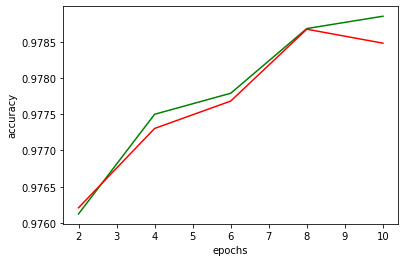

In [52]:
plt.plot(epochs, trainacc, color = 'g', label='training accuracy')
plt.plot(epochs, testacc, color = 'r', label='test accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

From the plot above 

### Tensorboard

In [53]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 340), started 11:18:51 ago. (Use '!kill 340' to kill it.)

From the TensorBoard guide, a brief overview of the dashboards shown:

- The **Scalars** dashboard shows how the loss and metrics change with every epoch. You can use it to also track training speed, learning rate, and other scalar values.
- The **Graphs** dashboard helps you visualize your model. In this case, the Keras graph of layers is shown which can help you ensure it is built correctly.
- The **Distributions** and **Histograms** dashboards show the distribution of a Tensor over time. This can be useful to visualize weights and biases and verify that they are changing in an expected way.

### Hyperparameter Tuning

To decide on the correct hyperparameters, we use gridsearch.

In [54]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [55]:
def create_model(hidden_layers, n_nodes, init_mode='uniform'):

    model = Sequential()
    model.add(Dense(24, input_dim=X_train.shape[1], activation='relu'))
    
    for i in range(int(hidden_layers)):
        model.add(Dense(n_nodes, activation='relu'))
    
    model.add(Dense(10, kernel_initializer=init_mode, activation='sigmoid'))

    model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
    return model

In [56]:
modelHT = KerasClassifier(build_fn=create_model, verbose=0)

In [58]:
#hidden_layers = [1,2,3,4,5,6,7,8,9,10]
hidden_layers = [1,2]
#n_nodes = [1,2,5,10,15,20,25]
n_nodes = [1,2]
param_grid = dict(hidden_layers=hidden_layers, n_nodes = n_nodes, batch_size = [256], epochs=[10])

In [59]:
grid = GridSearchCV(estimator=modelHT, param_grid=param_grid, scoring='accuracy')
grid_result = grid.fit(X_train, Y_train)

C:\Users\corri\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [60]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.968234 using {'batch_size': 256, 'epochs': 10, 'hidden_layers': 1, 'n_nodes': 1}
0.968234 (0.004371) with: {'batch_size': 256, 'epochs': 10, 'hidden_layers': 1, 'n_nodes': 1}
0.899909 (0.005610) with: {'batch_size': 256, 'epochs': 10, 'hidden_layers': 1, 'n_nodes': 2}
0.890425 (0.034352) with: {'batch_size': 256, 'epochs': 10, 'hidden_layers': 2, 'n_nodes': 1}
0.967053 (0.006751) with: {'batch_size': 256, 'epochs': 10, 'hidden_layers': 2, 'n_nodes': 2}


In [61]:
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.968234,0.004371,"{'batch_size': 256, 'epochs': 10, 'hidden_laye..."
1,0.899909,0.005610,"{'batch_size': 256, 'epochs': 10, 'hidden_laye..."
2,0.890425,0.034352,"{'batch_size': 256, 'epochs': 10, 'hidden_laye..."
3,0.967053,0.006751,"{'batch_size': 256, 'epochs': 10, 'hidden_laye..."


### Recreating with our best parameters

In [63]:
hl = grid.best_params_['hidden_layers']
num_nod = grid.best_params_['n_nodes']

tuned_ffmodel = create_model(hidden_layers = hl,n_nodes = num_nod)

In [65]:
epochs, trainacc, testacc = compile_fit(tuned_ffmodel, 10, 2) # computer version
# epochs, trainacc, testacc = compile_fit(tuned_ffmodel, 1000, 2) # HPC version

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 24)                1152      
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 25        
_________________________________________________________________
dense_78 (Dense)             (None, 10)                20        
Total params: 1,197
Trainable params: 1,197
Non-trainable params: 0
_________________________________________________________________
epoch : 0
Epoch 1/2
8930/8930 [==============================] - 7s 704us/step - loss: 0.1482 - accuracy: 0.9579 - val_loss: 0.1471 - val_accuracy: 0.9577
Epoch 2/2
7938/7938 [==============================] - 3s 337us/step - loss: 0.1468 - accuracy: 0.9577
epoch : 2
Epoch 1/2
8930/8930 [==============================] - 7s 728us/step - loss: 0.1454 - accuracy: 0.9580 - val_loss

The below code allows us to run this on the HPC and save our resulting files from this, the files in this folder are from running this on the HPC and not from running this on my own computer which is run with a smaller amount of epochs.

In [66]:
tuned_ffmodel.save('MattFFNNHPC')
pickle.dump(epochs, open('../epochs.p','wb'))
pickle.dump(trainacc, open('../trainacc.p','wb'))
pickle.dump(testacc, open('../testacc.p','wb'))

INFO:tensorflow:Assets written to: MattFFNNHPC\assets


### Predictions

We can load our model that is produced by the HPC if we so choose. This model is saved as 'MattFFNNHPC'. Uncomment the first cell to do this.

In [67]:
#from keras.models import load_model
#ffmodel = load_model('MattFFNNHPC')

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [69]:
predictions = tuned_ffmodel.predict(X_test)
Y_pred = predictions.argmax(axis=1)
Y_test_c = Y_test.values.tolist()

pickle.dump(Y_pred, open('../Y_predictions.p','wb'))
pickle.dump(Y_test_c, open('../Y_predictions.p','wb'))

In [70]:
a = confusion_matrix(Y_test_c, Y_pred)

<AxesSubplot:>

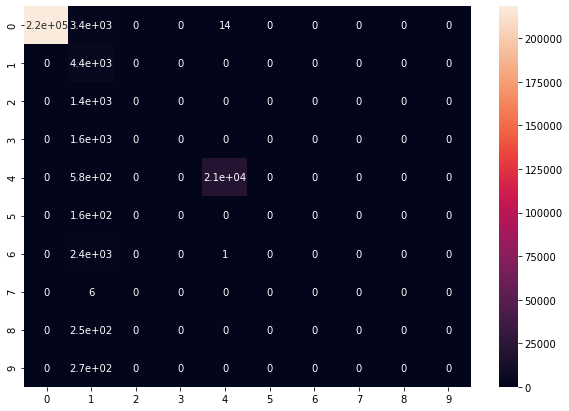

In [71]:
plt.figure(figsize = (10,7))
sn.heatmap(a, annot=True)

### Extreme Learning Machine

In [72]:
from scipy.linalg import pinv2

In [73]:
input_size = X_train.shape[1]
hidden_size = 100
input_weights = np.random.normal(size=[input_size,hidden_size])
biases = np.random.normal(size=[hidden_size])

In [74]:
def relu(x):
    return np.maximum(x, 0, x)

In [75]:
def hidden_nodes(X):
    G = np.dot(X, input_weights)
    G = G + biases
    H = relu(G)
    return H

In [76]:
output_weights = np.dot(pinv2(hidden_nodes(X_train)), Y_train)

In [77]:
def predict(X):
    out = hidden_nodes(X)
    out = np.dot(out, output_weights)
    return out

In [78]:
prediction = predict(X_test)
correct = 0
total = X_test.shape[0]
for i in range(total):
    predicted = np.argmax(prediction[i])
    actual = np.argmax(Y_test.iloc[i])
    correct += 1 if predicted == actual else 0
accuracy = correct/total
print('Accuracy for ', hidden_size, ' hidden nodes: ', accuracy)

Accuracy for  100  hidden nodes:  1.0


Working with: 1.000000 hidden nodes.
Working with: 2.000000 hidden nodes.
Working with: 3.000000 hidden nodes.
Working with: 4.000000 hidden nodes.
Working with: 5.000000 hidden nodes.
Working with: 6.000000 hidden nodes.
Working with: 7.000000 hidden nodes.
Working with: 8.000000 hidden nodes.
Working with: 9.000000 hidden nodes.
Working with: 10.000000 hidden nodes.
Working with: 11.000000 hidden nodes.
Working with: 12.000000 hidden nodes.
Working with: 13.000000 hidden nodes.
Working with: 14.000000 hidden nodes.
Working with: 15.000000 hidden nodes.
Working with: 16.000000 hidden nodes.
Working with: 17.000000 hidden nodes.
Working with: 18.000000 hidden nodes.
Working with: 19.000000 hidden nodes.
Working with: 20.000000 hidden nodes.
Working with: 21.000000 hidden nodes.
Working with: 22.000000 hidden nodes.
Working with: 23.000000 hidden nodes.
Working with: 24.000000 hidden nodes.
Working with: 25.000000 hidden nodes.
Working with: 26.000000 hidden nodes.
Working with: 27.0000

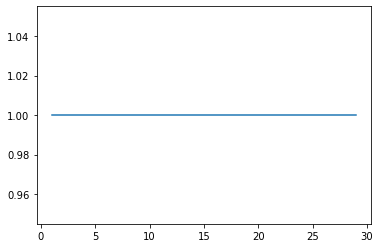

In [79]:
accuracys = np.zeros(29)

for i in range(1,30):
    
    print('Working with: {:1f} hidden nodes.'.format(i))
    
    input_size = X_train.shape[1]
    hidden_size = i
    input_weights = np.random.normal(size=[input_size,hidden_size])
    biases = np.random.normal(size=[hidden_size])
    
    output_weights = np.dot(pinv2(hidden_nodes(X_train)), Y_train)
    
    prediction = predict(X_test)
    correct = 0
    total = X_test.shape[0]
    for j in range(total):
        predicted = np.argmax(prediction[j])
        actual = np.argmax(Y_test.iloc[j])
        correct += 1 if predicted == actual else 0
        accuracy = correct/total
    accuracys[i-1] = accuracy
    
x = np.arange(1,30)

plt.plot(x,accuracys)
plt.show()

So the accuracy of our ELM is supposedly perfect no matter how many hidden nodes we use. It's an easier model to train but I'm not confident this is working correctly since I would presume there should be *some* deviation from perfect even with Neural Networks.

### References

1. [Data](https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/)
2. [Sanity check for .isnull vs isna](https://datascience.stackexchange.com/questions/37878/difference-between-isna-and-isnull-in-pandas)
3. [NaN loss adjustments](https://stackoverflow.com/questions/37232782/nan-loss-when-training-regression-network)
4. [Map functionality needed research due to NaN errors due to weird data](https://stackoverflow.com/questions/17114904/python-pandas-replacing-strings-in-dataframe-with-numbers)
5. [Extreme Learning Machine](https://towardsdatascience.com/build-an-extreme-learning-machine-in-python-91d1e8958599)
6. [Keras Layers](https://keras.io/api/layers/)
7. [Types of NN](https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464)
8. [Batch Size Importance](https://stats.stackexchange.com/questions/164876/what-is-the-trade-off-between-batch-size-and-number-of-iterations-to-train-a-neu#:~:text=In%20general%2C%20batch%20size%20of,best%20to%20start%20experimenting%20with.)
9. [Optimal Bacth Size](https://ai.stackexchange.com/questions/8560/how-do-i-choose-the-optimal-batch-size)
10. [Getting Started with TensorBoard](https://www.tensorflow.org/tensorboard/get_started)
11. [Saving & Loading NN](https://machinelearningmastery.com/save-load-keras-deep-learning-models/)
12. [Determining NN to use](https://pub.towardsai.net/main-types-of-neural-networks-and-its-applications-tutorial-734480d7ec8e)
13. [Confusion Matrix Visualisation](https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix)
14. [Removing Logs](https://stackoverflow.com/questions/303200/how-do-i-remove-delete-a-folder-that-is-not-empty)
15. [Catching Windows Errors](https://stackoverflow.com/questions/52541181/catch-a-specific-windows-error-number-python)
16. [Boltzmann Machines](https://www.kaggle.com/residentmario/restricted-boltzmann-machines-and-pretraining)
17. [Hyperparameter Tuning](https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/)
18. [Hyperparameter Tuning 2](https://www.datagraphi.com/blog/post/2019/12/17/how-to-find-the-optimum-number-of-hidden-layers-and-nodes-in-a-neural-network-model)